In [6]:
from training_framework import TrainingFramework
from architectures import ShallowFullyConnectedArchitecture, DeepFullyConnectedArchitecture, ConvolutionalArchitecture
from utils import Logger, validation_results

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EE-559 Deep Learning - Miniproject 1: Classification task on MNIST comparison - Albergoni, Bouvet, Feo

This notebook contains the same code as the ```test.py``` file, hence it trains the twelve models presented in the report, but additionally plots the training histories along with the results. This allows to get more insight on the behavior of architectures and models. As a remainder, the architectures and variants evaluated during the course of this project are:

##### Architectures
- Fully connected shallow network
- Fully connected deep network
- Convolutional network

##### Variants
- No weight sharing, no auxiliary task
- Weight sharing, no auxiliary task
- No weight sharing, single image classification as auxiliary task
- Weight sharing, single image classification as auxiliary task

### Plotting/summary functions

In [7]:
def hist_list_to_df(hist_list):
    df = pd.DataFrame(columns=['train_loss', 'train_acc', 'val_loss', 'val_acc'])
    
    for hist in hist_list:
        df_hist = pd.DataFrame({
            'train_loss':hist['train_loss'],
            'train_acc':hist['train_acc'],
            'val_loss':hist['val_loss'],
            'val_acc':hist['val_acc'],
            'epoch':list(range(len(hist['val_acc'])))
        })
        df = pd.concat([df, df_hist], axis=0, sort=True)

    return df


def plot_loss_acc(df, plot='main'):
    
    loss_title = "Evolution of cross-entropy loss for {} task over training".format(plot)
    acc_title = "Evolution of classification accuracy loss for {} task over training".format(plot)
    
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
        
    # Loss subplot
    ax1.set_title(loss_title)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.yaxis.grid(True)
    sns.lineplot(x='epoch', y='train_loss', data=df, label='training', ax=ax1)
    sns.lineplot(x='epoch', y='val_loss', data=df, label='validation', ax=ax1)
    
    # Accuracy subplot
    ax2.set_title(acc_title)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.yaxis.grid(True)
    sns.lineplot(x='epoch', y='train_acc', data=df, label='training', ax=ax2)
    sns.lineplot(x='epoch', y='val_acc', data=df, label='validation', ax=ax2)
    
    plt.show()
    

def print_best_results(df):
    df_avg = df.groupby('epoch').mean()
    last_acc = df_avg.loc[df_avg.index.max()]['val_acc']
    best_acc = df_avg.loc[df_avg.val_acc.idxmax()]['val_acc']

    print('Last epoch accuracy : \t epoch = %s \t val_acc = %s' % (int(df_avg.index.max()), last_acc))
    print('Best epoch accuracy : \t epoch = %s \t val_acc = %s' % (int(df_avg.val_acc.idxmax()), best_acc))

In [8]:
# Init framework
trn_framework = TrainingFramework(log_level='none')

### Fully connected shallow network

#### No weight sharing, no auxiliary loss

In [9]:
%%capture
trn_framework.enable_aux_task(False)
history_FCshallow_noWs_noAux = trn_framework.validate_model(ShallowFullyConnectedArchitecture)

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8218
Best epoch accuracy : 	 epoch = 34 	 val_acc = 0.8218


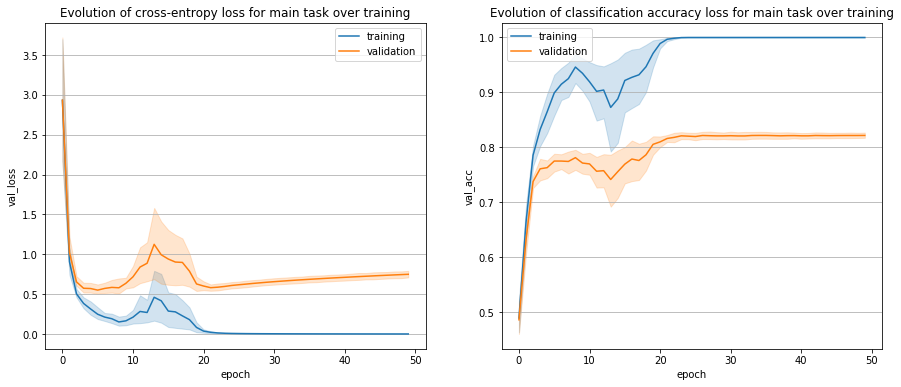

In [10]:
df_FCshallow_noWs_noAux = hist_list_to_df(history_FCshallow_noWs_noAux)
print_best_results(df_FCshallow_noWs_noAux)
plot_loss_acc(df_FCshallow_noWs_noAux)

#### Weight sharing, no auxiliary loss

In [11]:
%%capture
trn_framework.enable_aux_task(False)
history_FCshallow_yesWs_noAux = trn_framework.validate_model(lambda: ShallowFullyConnectedArchitecture(weight_sharing=True))

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8355
Best epoch accuracy : 	 epoch = 39 	 val_acc = 0.8359


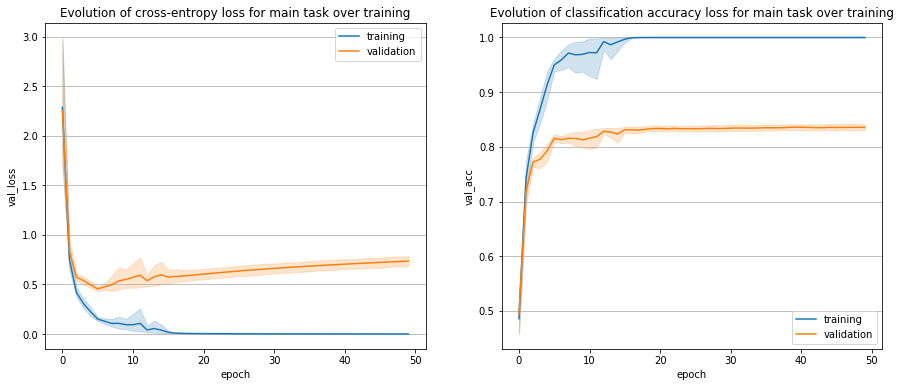

In [12]:
df_FCshallow_yesWs_noAux = hist_list_to_df(history_FCshallow_yesWs_noAux)
print_best_results(df_FCshallow_yesWs_noAux)
plot_loss_acc(df_FCshallow_yesWs_noAux)

#### No weight sharing, auxiliary loss

In [13]:
%%capture
trn_framework.enable_aux_task(True)
history_FCshallow_noWs_yesAux = trn_framework.validate_model(ShallowFullyConnectedArchitecture)

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8333
Best epoch accuracy : 	 epoch = 49 	 val_acc = 0.8333


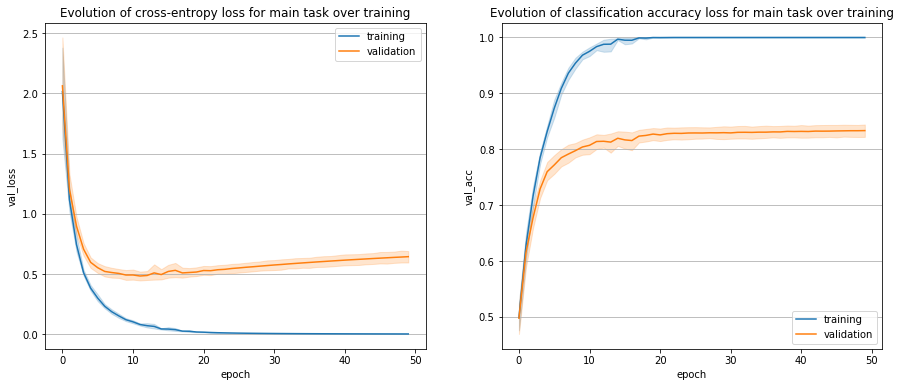

In [14]:
df_FCshallow_noWs_yesAux = hist_list_to_df(history_FCshallow_noWs_yesAux)
print_best_results(df_FCshallow_noWs_yesAux)
plot_loss_acc(df_FCshallow_noWs_yesAux)

#### Weight sharing, auxiliary loss

In [15]:
%%capture
trn_framework.enable_aux_task(True)
history_FCshallow_yesWs_yesAux = trn_framework.validate_model(lambda: ShallowFullyConnectedArchitecture(weight_sharing=True))

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8445
Best epoch accuracy : 	 epoch = 49 	 val_acc = 0.8445


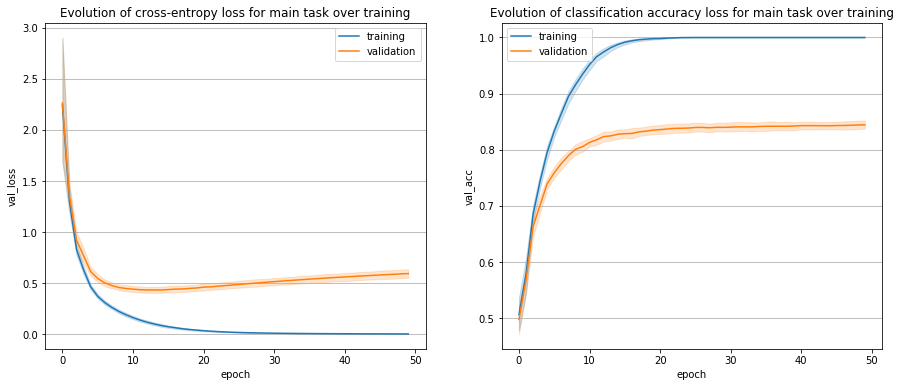

In [16]:
df_FCshallow_yesWs_yesAux = hist_list_to_df(history_FCshallow_yesWs_yesAux)
print_best_results(df_FCshallow_yesWs_yesAux)
plot_loss_acc(df_FCshallow_yesWs_yesAux)

### Fully connected deep network

#### No weight sharing, no auxiliary loss

In [17]:
%%capture
trn_framework.enable_aux_task(False)
history_FCdeep_noWs_noAux = trn_framework.validate_model(DeepFullyConnectedArchitecture)

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8115
Best epoch accuracy : 	 epoch = 23 	 val_acc = 0.8154000000000001


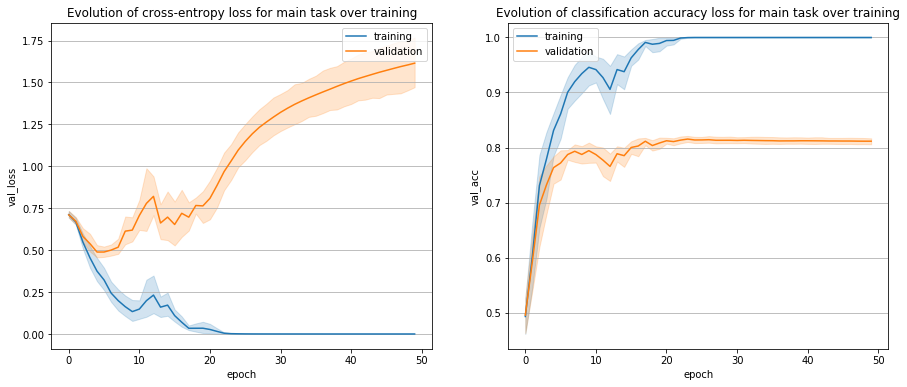

In [18]:
df_FCdeep_noWs_noAux = hist_list_to_df(history_FCdeep_noWs_noAux)
print_best_results(df_FCdeep_noWs_noAux)
plot_loss_acc(df_FCdeep_noWs_noAux)

#### Weight sharing, no auxiliary loss

In [19]:
%%capture
trn_framework.enable_aux_task(False)
history_FCdeep_yesWs_noAux = trn_framework.validate_model(lambda: DeepFullyConnectedArchitecture(weight_sharing=True))

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8326
Best epoch accuracy : 	 epoch = 14 	 val_acc = 0.8369


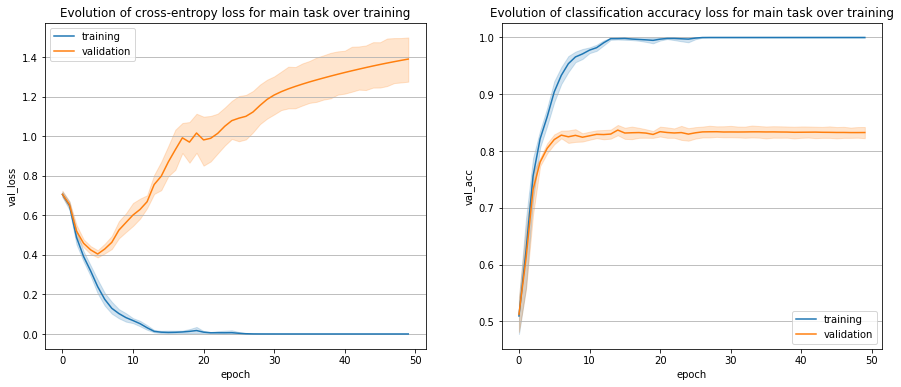

In [20]:
df_FCdeep_yesWs_noAux = hist_list_to_df(history_FCdeep_yesWs_noAux)
print_best_results(df_FCdeep_yesWs_noAux)
plot_loss_acc(df_FCdeep_yesWs_noAux)

#### No weight sharing, auxiliary loss

In [21]:
%%capture
trn_framework.enable_aux_task(True)
history_FCdeep_noWs_yesAux = trn_framework.validate_model(DeepFullyConnectedArchitecture)

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.9006000000000001
Best epoch accuracy : 	 epoch = 30 	 val_acc = 0.9043000000000001


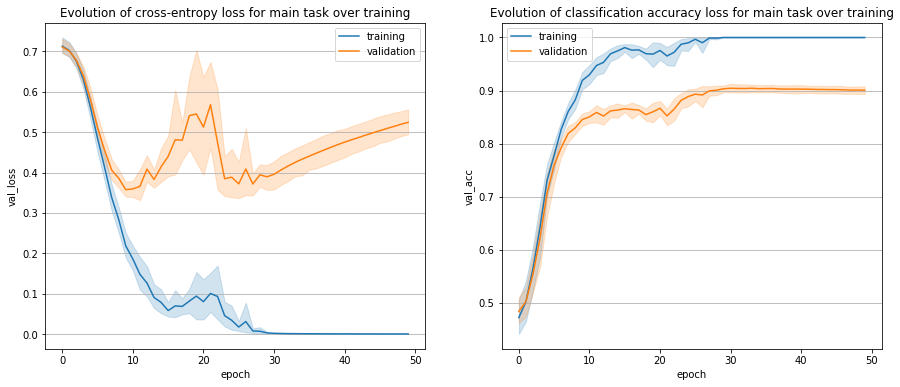

In [22]:
df_FCdeep_noWs_yesAux = hist_list_to_df(history_FCdeep_noWs_yesAux)
print_best_results(df_FCdeep_noWs_yesAux)
plot_loss_acc(df_FCdeep_noWs_yesAux)

#### Weight sharing, auxiliary loss

In [23]:
%%capture
trn_framework.enable_aux_task(True)
history_FCdeep_yesWs_yesAux = trn_framework.validate_model(lambda: DeepFullyConnectedArchitecture(weight_sharing=True))

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8960000000000001
Best epoch accuracy : 	 epoch = 25 	 val_acc = 0.8993


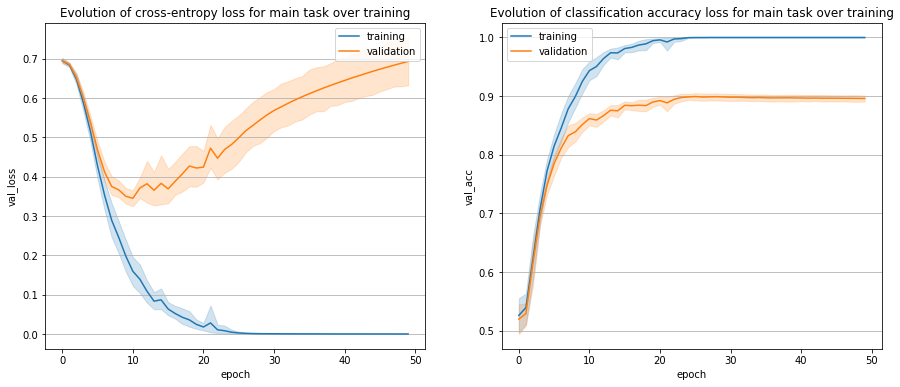

In [24]:
df_FCdeep_yesWs_yesAux = hist_list_to_df(history_FCdeep_yesWs_yesAux)
print_best_results(df_FCdeep_yesWs_yesAux)
plot_loss_acc(df_FCdeep_yesWs_yesAux)

### Convolutional network

#### No weight sharing, no auxiliary loss

In [25]:
%%capture
trn_framework.enable_aux_task(False)
history_Conv_noWs_noAux = trn_framework.validate_model(ConvolutionalArchitecture)

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8500999999999997
Best epoch accuracy : 	 epoch = 44 	 val_acc = 0.8512000000000001


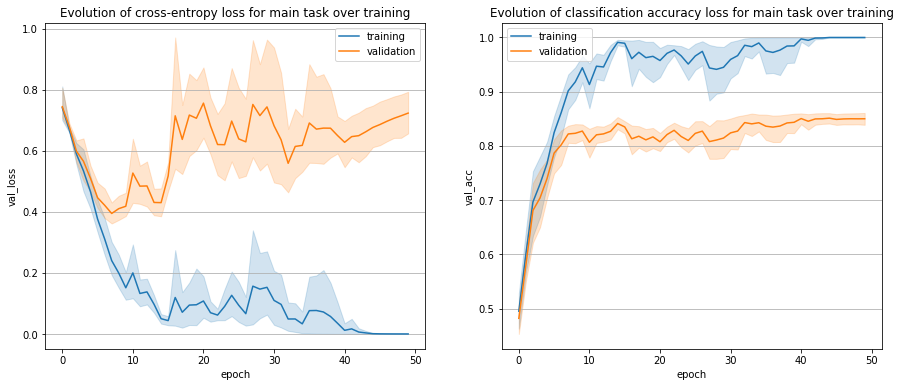

In [26]:
df_Conv_noWs_noAux = hist_list_to_df(history_Conv_noWs_noAux)
print_best_results(df_Conv_noWs_noAux)
plot_loss_acc(df_Conv_noWs_noAux)

#### Weight sharing, no auxiliary loss

In [27]:
%%capture
trn_framework.enable_aux_task(False)
history_Conv_yesWs_noAux = trn_framework.validate_model(lambda: ConvolutionalArchitecture(weight_sharing=True))

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8642
Best epoch accuracy : 	 epoch = 26 	 val_acc = 0.8648999999999999


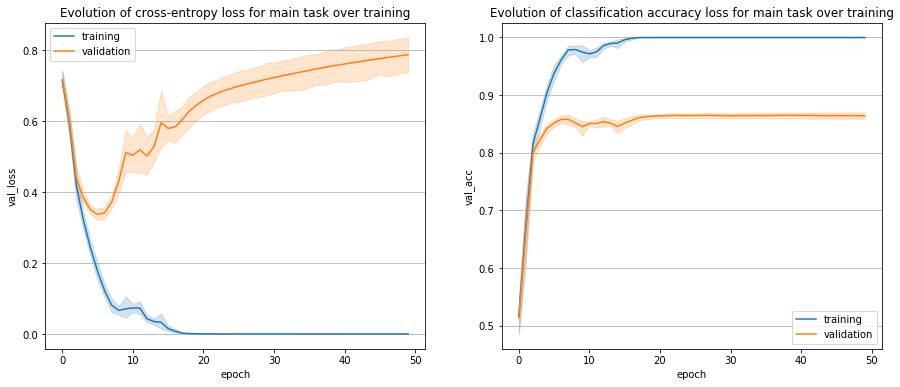

In [28]:
df_Conv_yesWs_noAux = hist_list_to_df(history_Conv_yesWs_noAux)
print_best_results(df_Conv_yesWs_noAux)
plot_loss_acc(df_Conv_yesWs_noAux)

#### No weight sharing, auxiliary loss

In [29]:
%%capture
trn_framework.enable_aux_task(True)
history_Conv_noWs_yesAux = trn_framework.validate_model(ConvolutionalArchitecture)

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.9037
Best epoch accuracy : 	 epoch = 45 	 val_acc = 0.9040000000000001


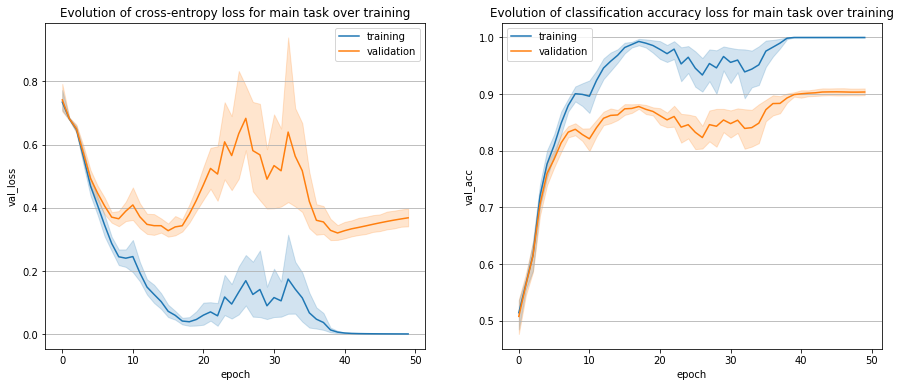

In [30]:
df_Conv_noWs_yesAux = hist_list_to_df(history_Conv_noWs_yesAux)
print_best_results(df_Conv_noWs_yesAux)
plot_loss_acc(df_Conv_noWs_yesAux)

#### Weight sharing, auxiliary loss

In [31]:
%%capture
trn_framework.enable_aux_task(True)
history_Conv_yesWs_yesAux = trn_framework.validate_model(lambda: ConvolutionalArchitecture(weight_sharing=True))

Last epoch accuracy : 	 epoch = 49 	 val_acc = 0.8947999999999998
Best epoch accuracy : 	 epoch = 33 	 val_acc = 0.8968999999999999


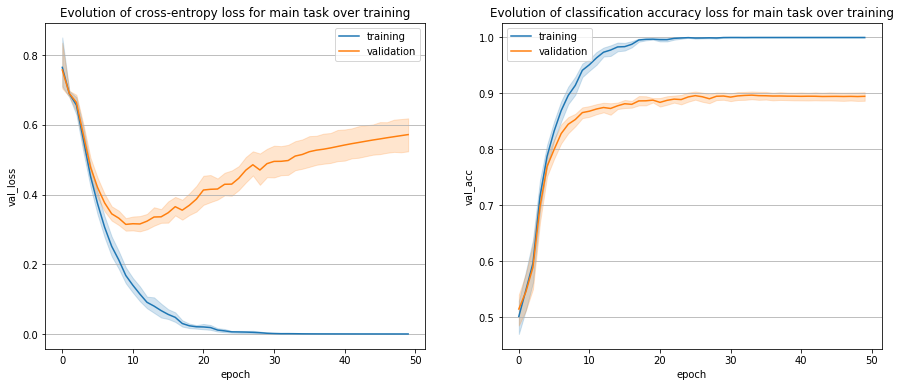

In [32]:
df_Conv_yesWs_yesAux = hist_list_to_df(history_Conv_yesWs_yesAux)
print_best_results(df_Conv_yesWs_yesAux)
plot_loss_acc(df_Conv_yesWs_yesAux)